In [ ]:
# !pip install --upgrade gspread

In [ ]:
# from google.colab import auth
# auth.authenticate_user()

# import gspread
# from oauth2client.client import GoogleCredentials

# gc = gspread.authorize(GoogleCredentials.get_application_default())

# About
You are given the enclosed data files in csv. They are data about occurrences
of earth quakes in a geographical region. The meta data is :
- Sl. No.: Serial Number
- Year, Month, Day: Date of a particular earthquake as per UTC (Coordi-
nated Universal Time)
- Origin Time of earthquake in UTC and IST (Indian Standard Time) in
[Hour: Minute: seconds] format
- Magnitude of Earthquake: There are a different way to represent the
magnitude of an earthquake. For your study, you can consider Mw, since
we are deriving other types from Mw only.
- GPS Location in terms of Latitude(Lat) and Longitude(Long) of earth-
quake
- Depth: Depth of occurrence of an earthquake in kilometre
- Location: Name of a region where an earthquake took place
- Source: The agency from which we have gathered the data, for e.g. IMD=
Indian Meteorological Department, Min. of Earth Science, Government
of India


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import sklearn.model_selection as model_selection

file_path = './earthquakes.csv'

input_fd = open(file_path, encoding="UTF-8", errors = 'backslashreplace')
earthquake_data = pd.read_csv(input_fd, encoding = "UTF-8")
# worksheet = gc.open('earthquakes.csv').sheet1

# get_all_values gives a list of rows.
# rows = worksheet.get_all_values()
# earthquake_data = pd.DataFrame(rows)
# earthquake_data.columns = earthquake_data.iloc[0]
# earthquake_data = earthquake_data.iloc[1:]

In [ ]:
earthquake_data.head()

,YEAR,MONTH,DATE,ORIGIN TIME,MAGNITUDE,LAT (N),LONG (E),DEPTH (km),INTENSITY,LOCATION,REFERENCE,Unnamed: 11
0,-2474,0.0,0.0,NaN,7.50,71.00,24.00,0.0,NaN,NaN,Dr STGR,NaN
1,-325,0.0,0.0,NaN,7.50,71.00,24.00,0.0,NaN,NaN,Dr STGR,NaN
2,25,0.0,0.0,NaN,7.50,72.90,33.72,0.0,NaN,NaN,Dr STGR,NaN
3,26,5.0,10.0,08.19.10.0,6.14,17.30,80.10,NaN,NaN,NaN,NEIC,NaN
4,26,5.0,10.0,08.19.10.0,6.14,26.00,97.00,80.0,NaN,Myanmar,G-R,NaN


In [ ]:
earthquake_data.columns

Index(['YEAR', 'MONTH', 'DATE', 'ORIGIN TIME', 'MAGNITUDE', 'LAT (N)',
       'LONG (E)', 'DEPTH (km)', 'INTENSITY', 'LOCATION', 'REFERENCE',
       'Unnamed: 11'],
      dtype='object')

In [ ]:
earthquake_data['LOCATION'] = earthquake_data['LOCATION'].fillna(earthquake_data['LOCATION'].mode()[0])
earthquake_data['REFERENCE'] = earthquake_data['REFERENCE'].fillna(earthquake_data['REFERENCE'].mode()[0])
earthquake_data['DEPTH (km)'].fillna(earthquake_data['DEPTH (km)'].mean(), inplace=True)
earthquake_data['INTENSITY'].fillna(earthquake_data['INTENSITY'].mean(), inplace=True)
earthquake_data['MAGNITUDE'].fillna(earthquake_data['MAGNITUDE'].mean(), inplace=True)

features = ['LAT (N)','LONG (E)', 'DEPTH (km)','INTENSITY']

X = earthquake_data[features]


print(X.shape)


print(X.tail())
y = earthquake_data.MAGNITUDE
# y = y.dropna()
print(y.head())

(52989, 4)
      LAT (N) LONG (E)  DEPTH (km)  INTENSITY
52984  32.8°N   78.4°E        10.0    5.55122
52985  25.5°N   90.4°E        70.0    5.55122
52986  23.2°N   86.5°E        22.0    5.55122
52987  32.8°N   76.4°E        20.0    5.55122
52988  20.0°N   72.8°E        10.0    5.55122
0    7.50
1    7.50
2    7.50
3    6.14
4    6.14
Name: MAGNITUDE, dtype: float64


In [ ]:
def latitude_convert(val):
    if type(val)==str:
      new_val = val.replace('\\','').replace('?','').replace('\xB0', '').replace(' ','').replace(',','.').replace('E', '').replace('ｰ', '')
      if new_val[-1]=='N':
        new_val = float(new_val[0:-1])
      elif new_val[-1]=='S':
        new_val = 180 - float(new_val[0:-1])
      else:
        new_val = float(new_val)
      return new_val
    return val

X['LAT (N)'] = X['LAT (N)'].apply(latitude_convert)
print(X['LAT (N)'].tail())

52984    32.8
52985    25.5
52986    23.2
52987    32.8
52988    20.0
Name: LAT (N), dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
def longitude_convert(val):
  # print(val)
  if type(val)==str:
    new_val = val.replace('\\','').replace('?','').replace('\xB0', '').replace(' ','').replace(',','.').replace('S','').replace('ｰ', '')
    if new_val[-1]=='E':
      new_val = float(new_val[0: -1])
    elif new_val[-1]=='W':
      new_val = 360 - float(new_val[0: -1])
    else:
      new_val = float(new_val)
    return new_val
  return val

X['LONG (E)'] = X['LONG (E)'].apply(longitude_convert)
print(X['LONG (E)'].tail())

52984    78.4
52985    90.4
52986    86.5
52987    76.4
52988    72.8
Name: LONG (E), dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# X['DEPTH (km)'] = X['DEPTH (km)'].astype(float)

In [ ]:
# from sklearn.impute import SimpleImputer

# features = ['LAT (N)','LONG (E)', 'DEPTH (km)']
# imp = SimpleImputer()
# X = pd.DataFrame(imp.fit_transform(X))


In [ ]:
print(X.dtypes)

LAT (N)       float64
LONG (E)      float64
DEPTH (km)    float64
INTENSITY     float64
dtype: object


In [ ]:
X.describe()

,LAT (N),LONG (E),DEPTH (km),INTENSITY
count,52989.000000,52989.000000,52989.000000,52989.000000
mean,58.301730,52.714535,45.569867,5.551220
std,31.614738,52.814771,54.364061,0.048942
min,-10.900000,0.800000,0.000000,3.000000
25%,26.930000,27.500000,10.000000,5.551220
50%,70.450000,37.410000,33.000000,5.551220
75%,91.310000,91.350000,52.000000,5.551220
max,180.000000,9128.200000,831.200000,10.000000


In [ ]:
T = 4.5
y_mag = earthquake_data.MAGNITUDE
y_mag = y_mag.astype('float')
print(y_mag)
print(y_mag.describe())
y_m = y_mag.copy()
y_m[y_m<T] = 0
y_m[y_m>=T] = 1
y = y_m.copy()
print(y.describe)

0        7.50
1        7.50
2        7.50
3        6.14
4        6.14
         ... 
52984    3.20
52985    3.60
52986    4.00
52987    4.30
52988    3.00
Name: MAGNITUDE, Length: 52989, dtype: float64
count    52989.000000
mean         4.537575
std          0.550127
min          2.000000
25%          4.300000
50%          4.537575
75%          4.700000
max          9.100000
Name: MAGNITUDE, dtype: float64
<bound method NDFrame.describe of 0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
52984    0.0
52985    0.0
52986    0.0
52987    0.0
52988    0.0
Name: MAGNITUDE, Length: 52989, dtype: float64>


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


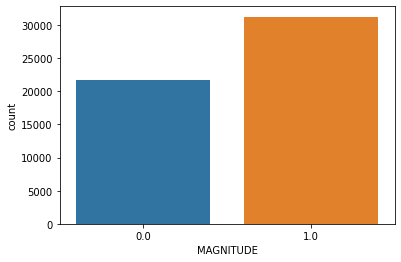

In [ ]:
import seaborn as sns
sns.countplot(y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=1)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

Y_pred_tree = model.predict(X_test)

In [ ]:
print(classification_report(y_test, Y_pred_tree))
roc_auc_score(y_test, Y_pred_tree)

              precision    recall  f1-score   support

         0.0       0.53      0.56      0.54      4304
         1.0       0.69      0.66      0.67      6294

    accuracy                           0.62     10598
   macro avg       0.61      0.61      0.61     10598
weighted avg       0.62      0.62      0.62     10598



0.6088986324380451

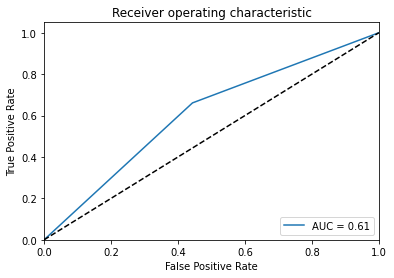

In [ ]:
#basically we have to plot this graph for multiple depths
fpr, tpr, _ = roc_curve(y_test, Y_pred_tree)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
fpr2_list = []
tpr2_list = []
def diff_values_d(d):
  dec_tree = DecisionTreeClassifier(max_depth=d)
  dec_tree.fit(X_train, y_train)
  y_pred = dec_tree.predict(X_test)
  fpr, tpr, _ = roc_curve(y_test, y_pred)
  fpr2_list.append(fpr)
  tpr2_list.append(tpr)
  return roc_auc_score(y_test, y_pred)

In [ ]:
roc_scores2 = np.array([])
for i in range(1,51):
  roc_scores2 = np.append(roc_scores2,diff_values_d(i))
print(roc_scores2)

[0.65953022 0.61378752 0.6647214  0.65849693 0.67859957 0.67756175
 0.68583979 0.67815121 0.67734399 0.67487793 0.67114337 0.66687664
 0.65734209 0.65998408 0.65529712 0.65357844 0.64916394 0.63927061
 0.63722479 0.63287349 0.63275049 0.63063036 0.62949342 0.62347815
 0.62416491 0.61944546 0.61997249 0.61833329 0.61411012 0.61331571
 0.61150652 0.61277244 0.61022351 0.60963667 0.60794365 0.60700915
 0.60662988 0.60648979 0.60851254 0.6094607  0.60784028 0.6076814
 0.60893536 0.60691775 0.60978444 0.60882602 0.60729103 0.60727224
 0.60796328 0.60699719]


In [ ]:
for i in range(1, 50):
  if roc_scores2[i] == max(roc_scores2):
    print("MAX Depth for largest ROC score = ", i)
print(max(roc_scores2))

MAX Depth for largest ROC score =  6
0.6858397919538641


In [ ]:
model = DecisionTreeClassifier(max_depth=6)
model.fit(X_train, y_train)

Y_pred_tree = model.predict(X_test)
print(classification_report(y_test, Y_pred_tree))

              precision    recall  f1-score   support

         0.0       0.60      0.65      0.62      4304
         1.0       0.75      0.70      0.73      6294

    accuracy                           0.68     10598
   macro avg       0.67      0.68      0.67     10598
weighted avg       0.69      0.68      0.68     10598



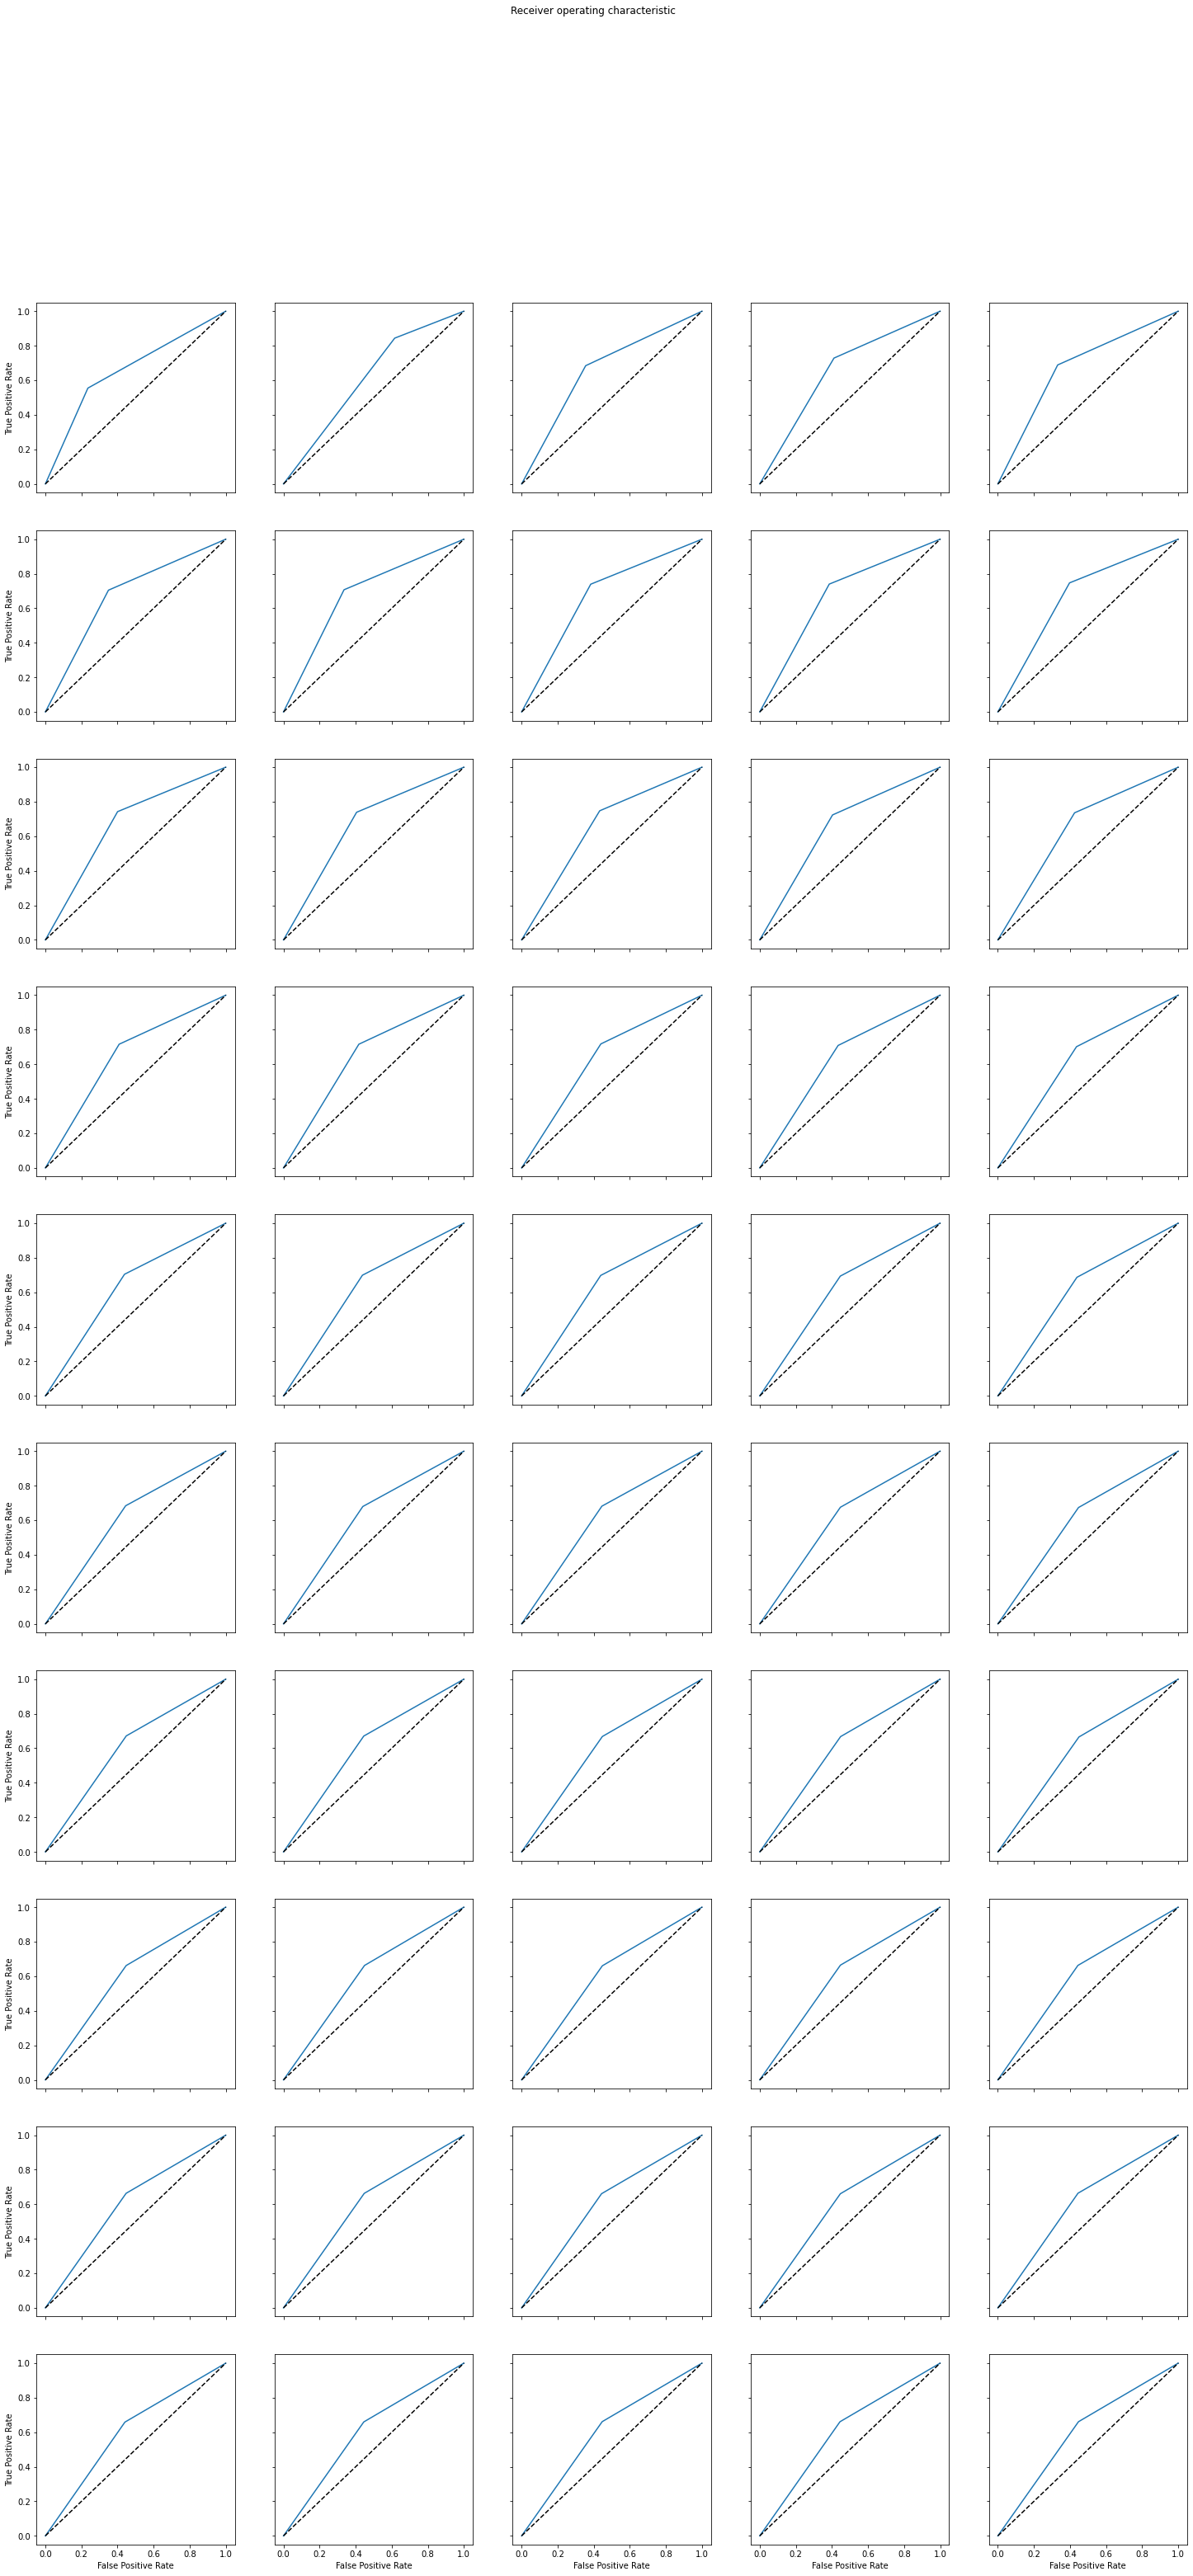

In [ ]:
fig, axs = plt.subplots(10, 5, figsize=(25,50))
fig.suptitle('Receiver operating characteristic')
for i in range(10):
  for j in range(5):
    axs[i , j].plot(fpr2_list[i*5+j], tpr2_list[i*5+j], label = 'AUC = %0.2f' % roc_scores2[i*5+j])
    axs[i , j].plot([0, 1], [0, 1], 'k--')
for ax in axs.flat:
  ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
for ax in axs.flat:
  ax.label_outer()

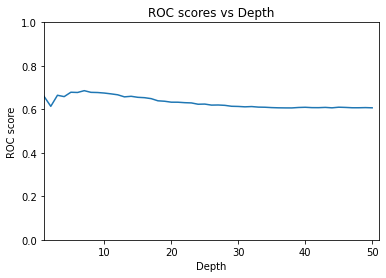

In [ ]:
plt.title('ROC scores vs Depth')
plt.plot(range(1,51), roc_scores2)
plt.xlim([1, 51])
plt.ylim([0, 1])
plt.ylabel('ROC score')
plt.xlabel('Depth')
plt.show()

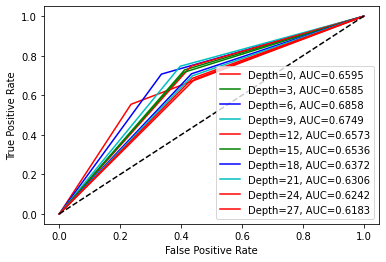

In [ ]:
plt.plot(fpr2_list[0],  tpr2_list[0],c='r',   label = 'Depth=0, AUC=%0.4f' % (roc_scores2[0]))
plt.plot(fpr2_list[3],  tpr2_list[3], c='g',  label = 'Depth=3, AUC=%0.4f' % (roc_scores2[3]))
plt.plot(fpr2_list[6], tpr2_list[6], c='b',label = 'Depth=6, AUC=%0.4f' % (roc_scores2[6]))
plt.plot(fpr2_list[9], tpr2_list[9], c='c',label = 'Depth=9, AUC=%0.4f' % (roc_scores2[9]))
plt.plot(fpr2_list[12], tpr2_list[12], c='r',label = 'Depth=12, AUC=%0.4f' % (roc_scores2[12]))
plt.plot(fpr2_list[15], tpr2_list[15], c='g',label = 'Depth=15, AUC=%0.4f' % (roc_scores2[15]))
plt.plot(fpr2_list[18], tpr2_list[18], c='b',label = 'Depth=18, AUC=%0.4f' % (roc_scores2[18]))
plt.plot(fpr2_list[21], tpr2_list[21], c='c',label = 'Depth=21, AUC=%0.4f' % (roc_scores2[21]))
plt.plot(fpr2_list[24], tpr2_list[24], c='r',label = 'Depth=24, AUC=%0.4f' % (roc_scores2[24]))
plt.plot(fpr2_list[27], tpr2_list[27], c='r',label = 'Depth=27, AUC=%0.4f' % (roc_scores2[27]))
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc='lower right',prop={'size': 10})
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

            LAT (N)      LONG (E)    DEPTH (km)     INTENSITY     Magnitude
count  52989.000000  52989.000000  52989.000000  52989.000000  52989.000000
mean      58.301730     52.714535     45.569867      5.551220      4.537575
std       31.614738     52.814771     54.364061      0.048942      0.550127
min      -10.900000      0.800000      0.000000      3.000000      2.000000
25%       26.930000     27.500000     10.000000      5.551220      4.300000
50%       70.450000     37.410000     33.000000      5.551220      4.537575
75%       91.310000     91.350000     52.000000      5.551220      4.700000
max      180.000000   9128.200000    831.200000     10.000000      9.100000


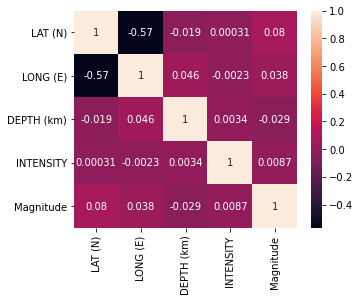

In [ ]:
full_data = X.copy()
# print(y_mag.describe())
full_data['Magnitude'] = y_mag.copy()
print(full_data.describe())
#Using Pearson Correlation
plt.figure(figsize=(5,4))
cormat = full_data.corr()
sns.heatmap(cormat, annot=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


0.6647214022205606


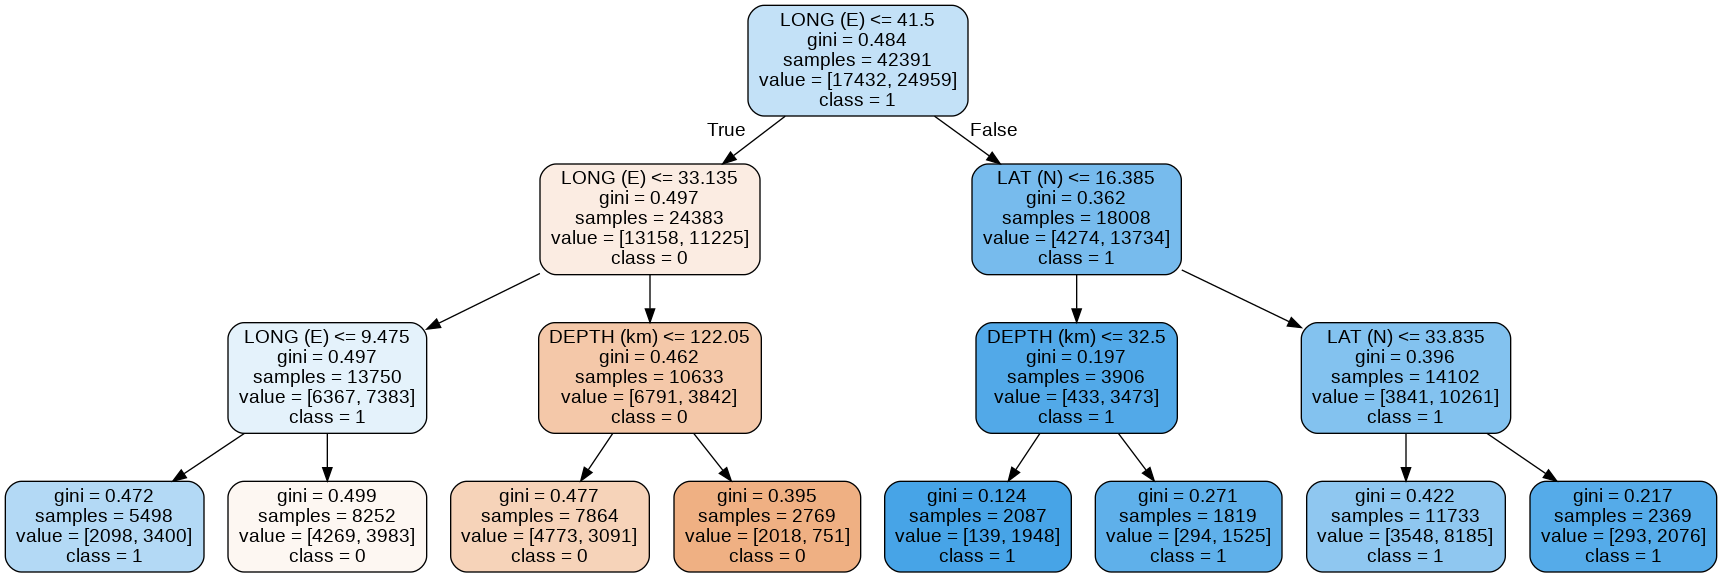

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dec_tree_temp = DecisionTreeClassifier(max_depth=3,max_leaf_nodes=50)
dec_tree_temp.fit(X_train, y_train)
y_pred = dec_tree_temp.predict(X_test)
print(roc_auc_score(y_test, y_pred))
dot_data = StringIO()
export_graphviz(dec_tree_temp, out_file=dot_data,  filled=True, feature_names = ['LAT (N)','LONG (E)', 'DEPTH (km)', 'INTENSITY'], rounded=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('earthquake.png')
Image(graph.create_png())

In [ ]:
from sklearn import preprocessing


lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, training_scores_encoded)
y_pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.59      0.56      0.58      4304
         1.0       0.71      0.74      0.72      6294

    accuracy                           0.67     10598
   macro avg       0.65      0.65      0.65     10598
weighted avg       0.66      0.67      0.66     10598



0.6492194947569113

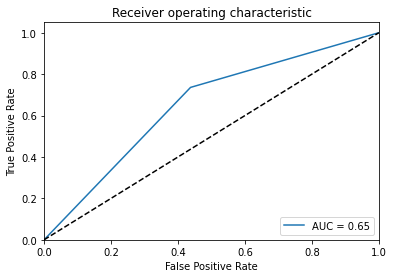

In [ ]:
#basically we plot this graph for multiple k
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
fpr1_list = []
tpr1_list = []
def diff_values_k(k):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, training_scores_encoded)
  y_pred = knn.predict(X_test)
  fpr, tpr, _ = roc_curve(y_test, y_pred)
  fpr1_list.append(fpr)
  tpr1_list.append(tpr)
  return roc_auc_score(y_test, y_pred)


In [ ]:
roc_scores = np.array([])
for i in range(1,51):
  roc_scores = np.append(roc_scores,diff_values_k(i))
print(roc_scores)

[0.61258879 0.62165921 0.634968   0.64905869 0.64921949 0.66223478
 0.66039244 0.67161735 0.66160284 0.67544077 0.66476851 0.67234432
 0.66576535 0.67457977 0.66939656 0.67858256 0.66645042 0.67749431
 0.66937946 0.6801765  0.67329085 0.68309189 0.67564502 0.68211981
 0.67469173 0.6825657  0.67493603 0.68076164 0.67601147 0.68456966
 0.68076168 0.6881889  0.67996129 0.6867641  0.68140403 0.68605512
 0.68071981 0.68637288 0.67984597 0.68721683 0.68313548 0.68768749
 0.68353952 0.68803002 0.68435869 0.6862755  0.6830381  0.6840691
 0.68414429 0.68519921]


In [ ]:
for i in range(1, 50):
  if roc_scores[i] == max(roc_scores):
    print("K for largest ROC score = ", i)
print(max(roc_scores))

K for largest ROC score =  31
0.6881889047573484


In [ ]:
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train, training_scores_encoded)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.63      0.60      0.62      4304
         1.0       0.74      0.76      0.75      6294

    accuracy                           0.70     10598
   macro avg       0.68      0.68      0.68     10598
weighted avg       0.69      0.70      0.69     10598



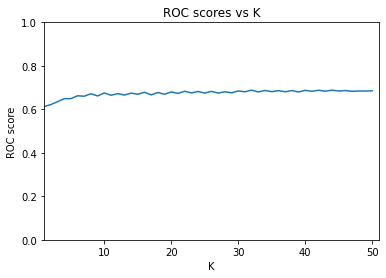

In [ ]:
plt.title('ROC scores vs K')
plt.plot(range(1,51), roc_scores)
plt.xlim([1, 51])
plt.ylim([0, 1])
plt.ylabel('ROC score')
plt.xlabel('K')
plt.show()

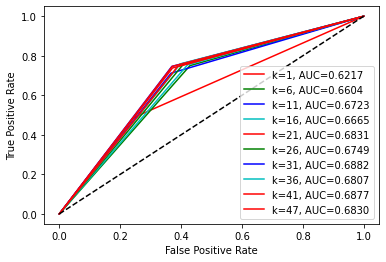

In [ ]:
plt.plot(fpr1_list[1], tpr1_list[1],c='r',label = 'k=1, AUC=%0.4f' % (roc_scores[1]))
plt.plot(fpr1_list[6], tpr1_list[6], c='g',label = 'k=6, AUC=%0.4f' % (roc_scores[6]))
plt.plot(fpr1_list[11], tpr1_list[11], c='b',label = 'k=11, AUC=%0.4f' % (roc_scores[11]))
plt.plot(fpr1_list[16], tpr1_list[16], c='c',label = 'k=16, AUC=%0.4f' % (roc_scores[16]))
plt.plot(fpr1_list[21], tpr1_list[21], c='r',label = 'k=21, AUC=%0.4f' % (roc_scores[21]))
plt.plot(fpr1_list[26], tpr1_list[26], c='g',label = 'k=26, AUC=%0.4f' % (roc_scores[26]))
plt.plot(fpr1_list[31], tpr1_list[31], c='b',label = 'k=31, AUC=%0.4f' % (roc_scores[31]))
plt.plot(fpr1_list[36], tpr1_list[36], c='c',label = 'k=36, AUC=%0.4f' % (roc_scores[36]))
plt.plot(fpr1_list[41], tpr1_list[41], c='r',label = 'k=41, AUC=%0.4f' % (roc_scores[41]))
plt.plot(fpr1_list[46], tpr1_list[41], c='r',label = 'k=47, AUC=%0.4f' % (roc_scores[46]))
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc='lower right',prop={'size': 10})
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

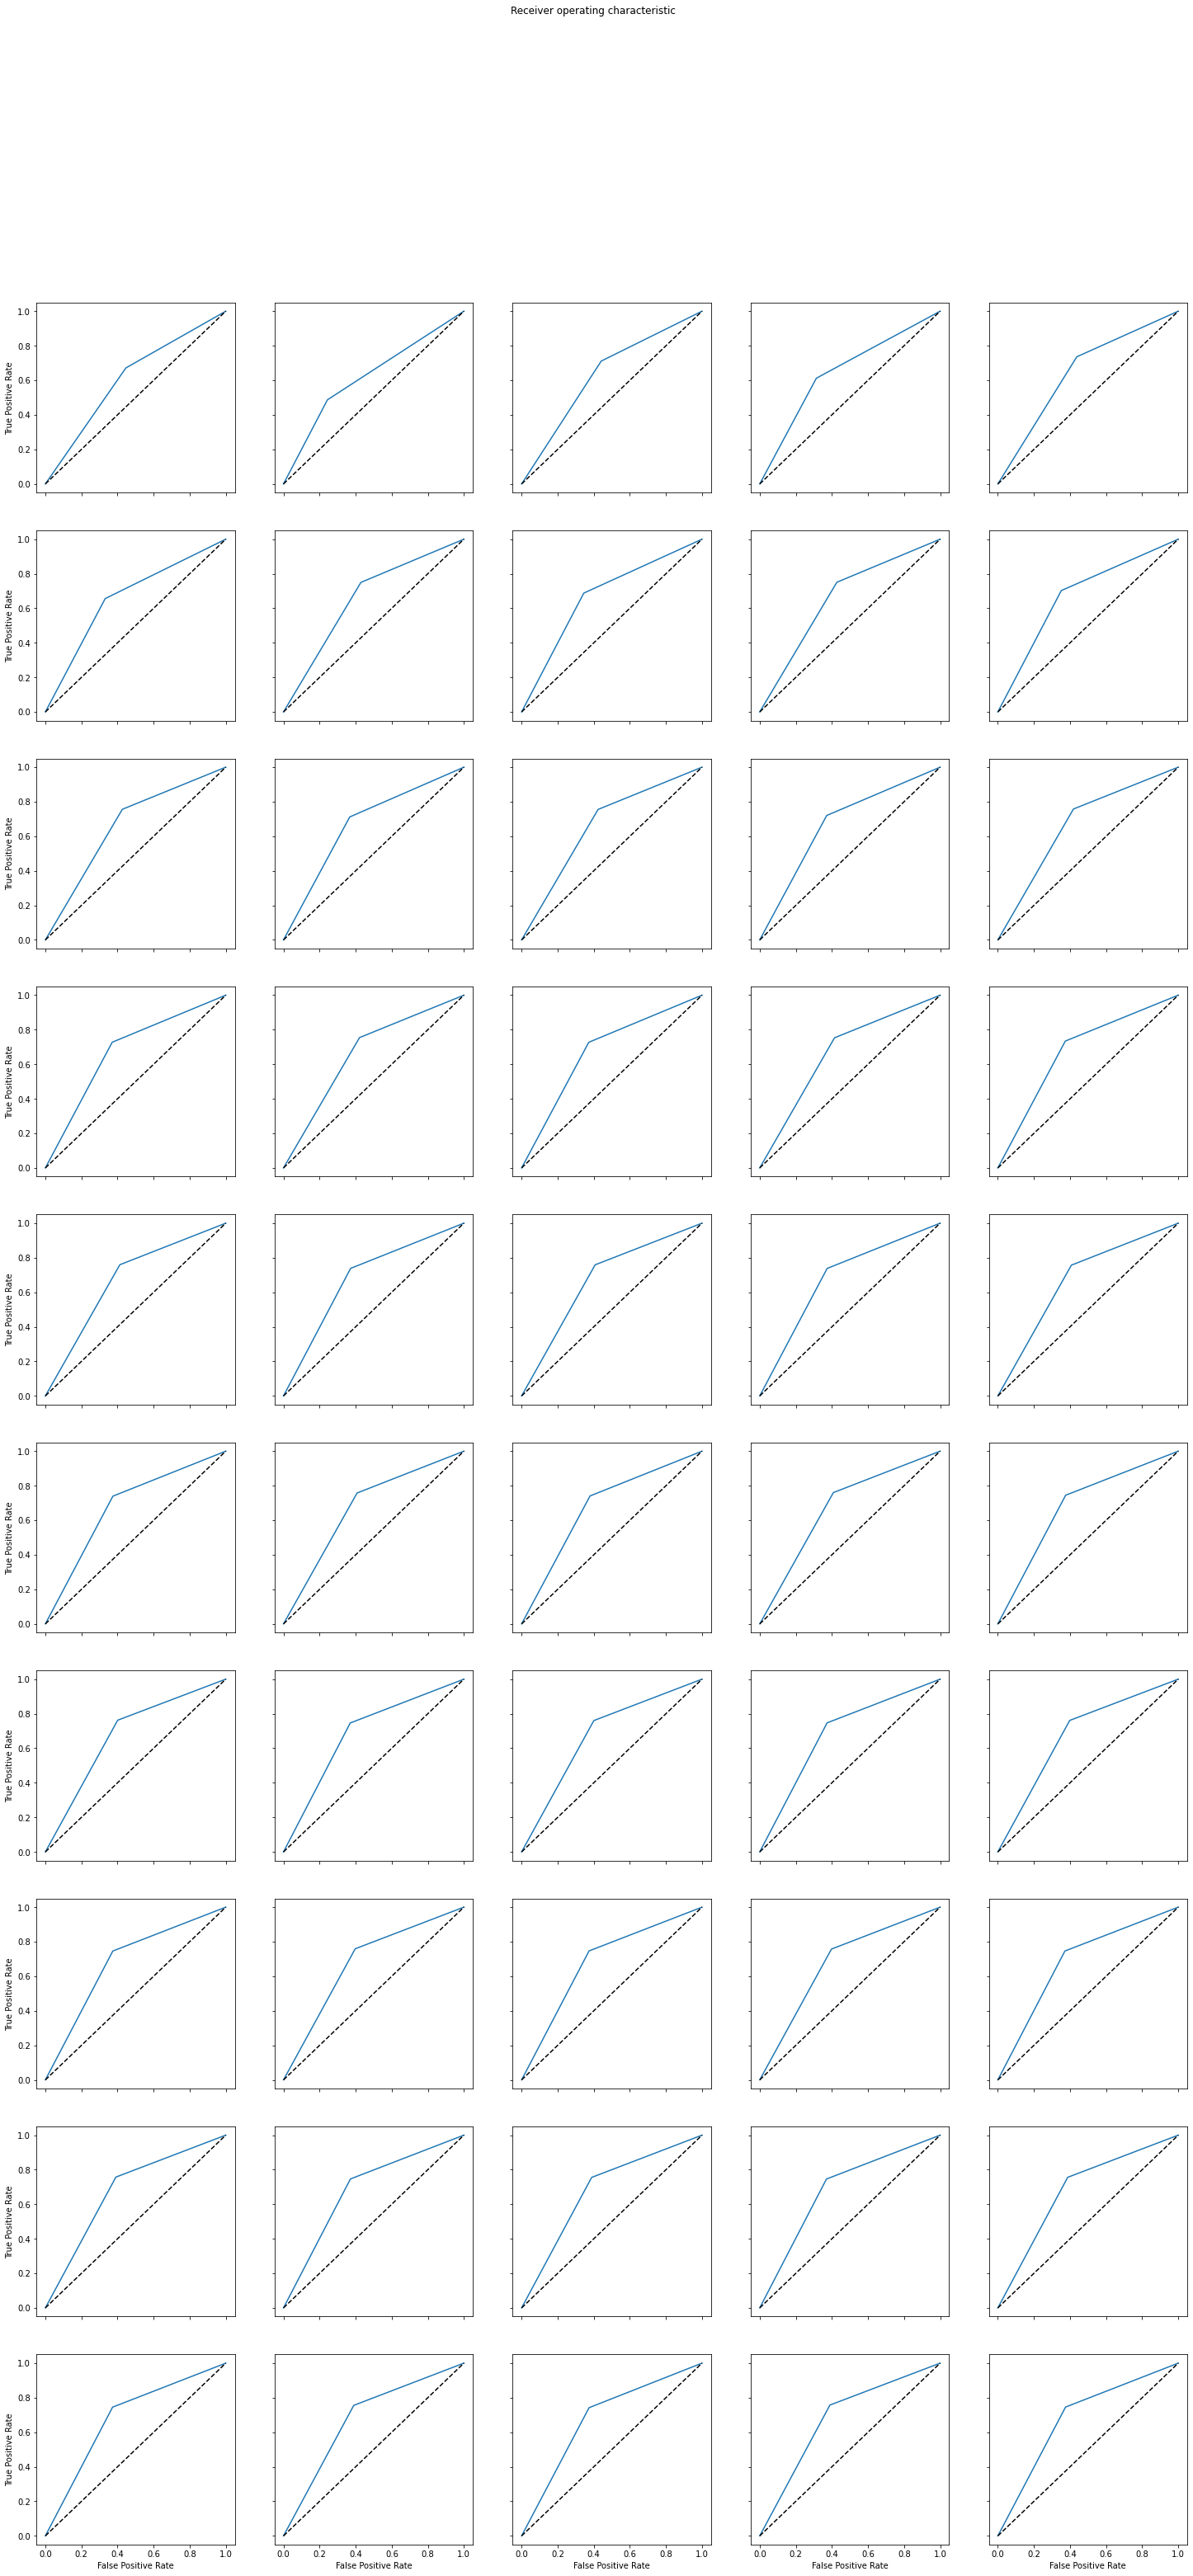

In [ ]:
fig, axs = plt.subplots(10, 5, figsize=(25,50))
fig.suptitle('Receiver operating characteristic')
for i in range(10):
  for j in range(5):
    axs[i , j].plot(fpr1_list[i*5+j], tpr1_list[i*5+j], label = 'AUC = %0.2f' % roc_scores[i*5+j])
    axs[i , j].plot([0, 1], [0, 1], 'k--')
for ax in axs.flat:
  ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
for ax in axs.flat:
  ax.label_outer()

In [ ]:
features = ['LAT (N)','LONG (E)', 'DEPTH (km)','LOCATION','REFERENCE','INTENSITY']

object_cols = ['LOCATION','REFERENCE']

X[object_cols] = earthquake_data[object_cols] 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=1)
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_test.index = X_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_test = X_test.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)
print(X_test.head())
print(OH_X_train.head())

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


       LAT (N)  LONG (E)  DEPTH (km)  INTENSITY LOCATION    REFERENCE
40485    95.93      2.58         0.0    5.55122  Myanmar      Dr STGR
18606    93.80     14.10        33.0    5.55122  Myanmar      Dr STGR
14894    17.33     94.17        25.0    5.55122  Myanmar  NEIC / USGS
7725     96.16     25.61       144.0    5.55122  Myanmar      Dr STGR
42404    93.45     14.27        30.0    5.55122  Myanmar      Dr STGR
       LAT (N)  LONG (E)  DEPTH (km)  INTENSITY  ...  1406  1407  1408  1409
18864     9.78     94.06        33.0    5.55122  ...   0.0   0.0   0.0   0.0
29108    72.82     39.85         0.0    5.55122  ...   0.0   0.0   0.0   0.0
47267    95.92      4.56        30.0    5.55122  ...   0.0   0.0   0.0   0.0
30138    10.07     92.87        33.0    5.55122  ...   0.0   0.0   0.0   0.0
32805    86.94     28.31        87.1    5.55122  ...   0.0   0.0   0.0   0.0

[5 rows x 1414 columns]


In [ ]:
# Use decision tree classifier
model = DecisionTreeClassifier(max_depth=6)
# model = DecisionTreeRegressor(random_state=1)
model.fit(OH_X_train, y_train)

Y_pred_tree = model.predict(OH_X_test)


In [ ]:
print(classification_report(y_test, Y_pred_tree))
print(roc_auc_score(y_test, Y_pred_tree))

              precision    recall  f1-score   support

         0.0       0.60      0.67      0.64      4304
         1.0       0.76      0.70      0.73      6294

    accuracy                           0.69     10598
   macro avg       0.68      0.69      0.68     10598
weighted avg       0.69      0.69      0.69     10598

0.6851521423010999


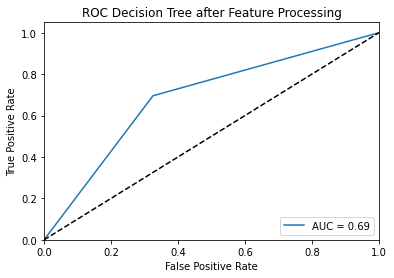

In [ ]:
#basically we have to plot this graph for multiple depths
fpr, tpr, _ = roc_curve(y_test, Y_pred_tree)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Decision Tree after Feature Processing')
plt.legend(loc='lower right')
plt.show()

In [ ]:

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)

knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(OH_X_train, training_scores_encoded)
y_pred = knn.predict(OH_X_test)

In [ ]:
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.63      0.60      0.62      4304
         1.0       0.74      0.76      0.75      6294

    accuracy                           0.70     10598
   macro avg       0.69      0.68      0.68     10598
weighted avg       0.70      0.70      0.70     10598



0.6821557277657485

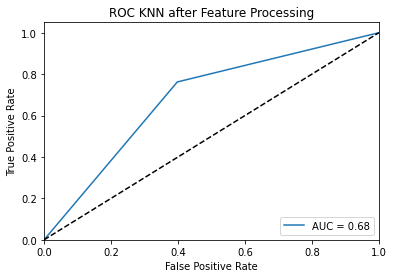

In [ ]:
#basically we plot this graph for multiple k
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC KNN after Feature Processing')
plt.legend(loc='lower right')
plt.show()